In [1]:
# importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading data
train = pd.read_csv('train_data.csv')

In [3]:
train.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [4]:
train.shape

(18247, 3)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


**We have 3 variables-**
* **Continuous variable -** demand
* **Categorical variable -** hour
* **Datetime variable -** date

* **Target variable -** demand
#### As we need to predict a continuous value, we can consider it as a regression problem

In [6]:
# Converting datetime variables from 'object' to datetime
import datetime
train['date'] = pd.to_datetime(train['date'])

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    18247 non-null  datetime64[ns]
 1   hour    18247 non-null  int64         
 2   demand  18247 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 427.8 KB


In [8]:
# extracting data from datetime variable
def extract_data_from_date(df):
    df['day_name'] = df['date'].apply(lambda x: x.day_name())
    df['month'] = df['date'].apply(lambda x: x.month_name())
    df['day_no'] = df['date'].dt.day
    df['year'] = df['date'].dt.year
    df['week_of_year'] = df['date'].dt.isocalendar().week

In [9]:
extract_data_from_date(train)

In [10]:
def get_day_type(df):
    weekend = ['Sunday','Saturday']
    week_day = ['Monday','Tuesday','Wednesday','Thursday','Friday']
    df['day_type'] = df['day_name'].apply(lambda x:'weekend' if x in weekend else 'week day')

In [11]:
get_day_type(train)

In [12]:
train.sample(5)

,date,hour,demand,day_name,month,day_no,year,week_of_year,day_type
16011,2020-10-20,10,55,Tuesday,October,20,2020,43,week day
5072,2019-05-04,11,127,Saturday,May,4,2019,18,weekend
4393,2019-03-31,17,63,Sunday,March,31,2019,13,weekend
15436,2020-09-23,14,33,Wednesday,September,23,2020,39,week day
12183,2020-04-21,8,98,Tuesday,April,21,2020,17,week day


# EDA

#### variable - hour

In [13]:
train['hour'].value_counts()

16    892
15    890
13    889
17    889
12    888
14    886
18    884
10    884
11    883
9     878
19    878
8     870
20    864
21    858
22    837
7     806
23    776
0     726
6     679
1     587
2     553
5     338
4     325
3     287
Name: hour, dtype: int64

* **There are 24 categories which shows 24 hr time format**

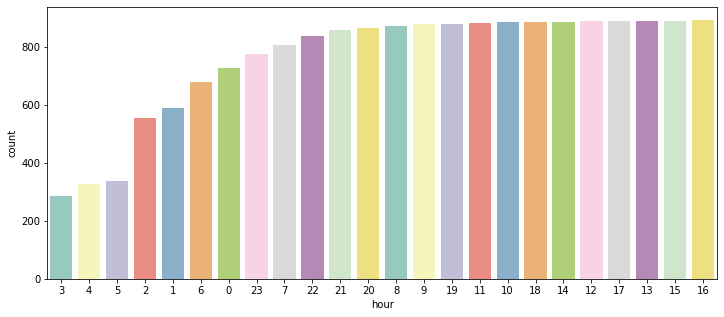

In [14]:
plt.figure(figsize=(12,5))
sns.countplot(data = train, x = train['hour'],order=train['hour'].value_counts().sort_values().index, palette = 'Set3')
plt.show()

* **There is less count at 3rd,4th and 5th hour that could be because these hours are generally considered as the sleep hours and people don't use car  services**
* **There is high count between 8th and 21st hr (i.e. 8 AM to 9 PM) which could be because those are considred as working hours or the time when people generally prefer to travel**
* **Note-** This is only count of number of records available for a value in our dataset

#### variable - day_name

In [15]:
train['day_name'].value_counts()

Friday       2671
Saturday     2657
Sunday       2649
Monday       2589
Wednesday    2565
Tuesday      2564
Thursday     2552
Name: day_name, dtype: int64

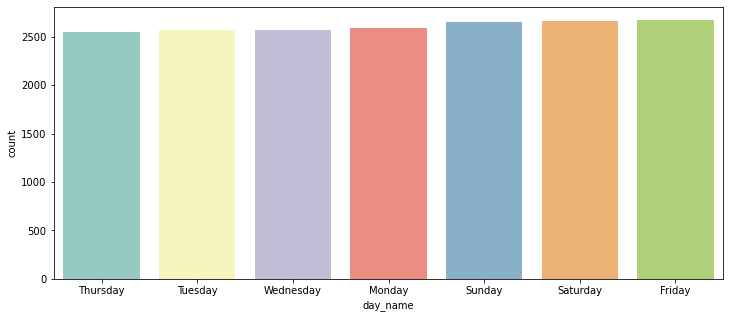

In [16]:
plt.figure(figsize=(12,5))
sns.countplot(data = train, x = train['day_name'],order=train['day_name'].value_counts().sort_values().index, palette = 'Set3')
plt.show()

* **According to our dataset, all days in a week have identical count**

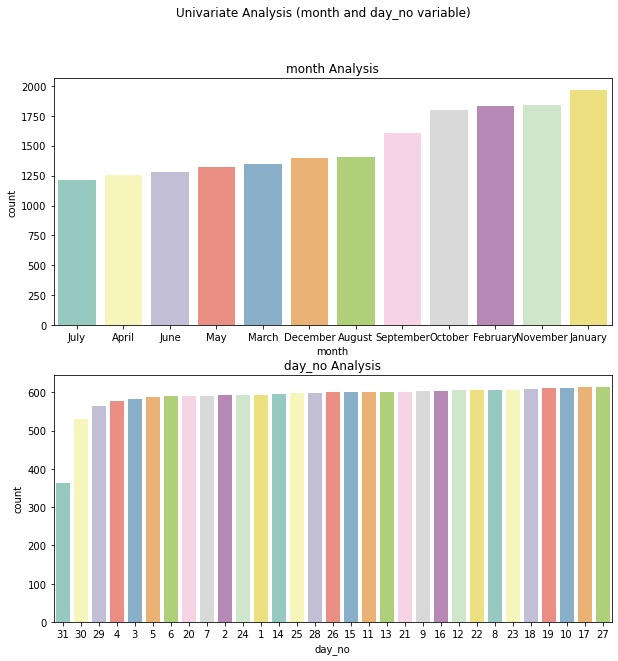

In [17]:
fig, axes = plt.subplots(2, 1,figsize=(10,10))
fig.suptitle('Univariate Analysis (month and day_no variable)')
axes[0].set_title('month Analysis')
axes[1].set_title("day_no Analysis")
sns.countplot(ax = axes[0],data = train, x = train['month'],order=train['month'].value_counts().sort_values().index, palette = 'Set3')
sns.countplot(ax = axes[1],data = train, x = train['day_no'],order=train['day_no'].value_counts().sort_values().index, palette = 'Set3')
plt.show()

* **According to our dataset, January has the highest count and July has lowest count. It could be, because we have a lot more data for January as compared to July as the data for July was not recorded for some reason**
* **Same with 31st day, possibly data was not recorded for this day**

In [18]:
train.head()

,date,hour,demand,day_name,month,day_no,year,week_of_year,day_type
0,2018-08-18,9,91,Saturday,August,18,2018,33,weekend
1,2018-08-18,10,21,Saturday,August,18,2018,33,weekend
2,2018-08-18,13,23,Saturday,August,18,2018,33,weekend
3,2018-08-18,14,104,Saturday,August,18,2018,33,weekend
4,2018-08-18,15,81,Saturday,August,18,2018,33,weekend


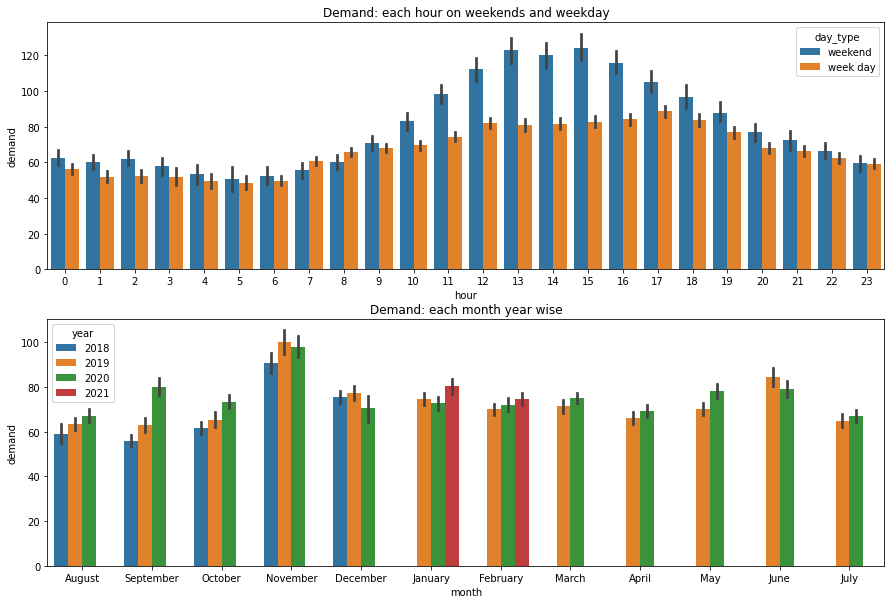

In [19]:
fig,axes = plt.subplots(2,1,figsize=(15,10))
axes[0].set_title('Demand: each hour on weekends and weekday')
axes[1].set_title('Demand: each month year wise')
sns.barplot(ax=axes[0],data=train, x='hour',y='demand',hue='day_type')
sns.barplot(ax=axes[1],data=train, y='demand',x='month',hue='year')
plt.show()

In [20]:
train.drop('date',axis=1, inplace=True)

In [21]:
X = train.drop('demand',axis=1)
y = train.iloc[:,1]

In [22]:
X.head()

,hour,day_name,month,day_no,year,week_of_year,day_type
0,9,Saturday,August,18,2018,33,weekend
1,10,Saturday,August,18,2018,33,weekend
2,13,Saturday,August,18,2018,33,weekend
3,14,Saturday,August,18,2018,33,weekend
4,15,Saturday,August,18,2018,33,weekend


In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
trf = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,1,2,3,4,5,6])
],remainder='passthrough')

In [24]:
trf.fit_transform(X)

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [26]:
X_train = trf.fit_transform(X_train)

In [27]:
X_test = trf.transform(X_test)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
X_train.shape

(16422, 133)

In [30]:
y_test.shape

(1825,)

In [31]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [32]:
reg.fit(X_train,y_train)

LinearRegression()

In [33]:
y_pred = reg.predict(X_test)

In [34]:
y_test.values

array([ 62,  39,   2, ...,  67, 104,  20], dtype=int64)

In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 score",r2_score(y_test,y_pred))

MAE 29.85606846130997
MSE 1351.379792366582
RMSE 36.76111794228492
R2 score 0.25877394189340963


In [36]:
y_pred

array([76.45635609, 33.33135609, 56.45635609, ..., 98.26885609,
       69.51885609, 82.30010609])

In [58]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=19)

In [59]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=19)

In [60]:
y_pred_rf = rf.predict(X_test)

In [61]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE",mean_absolute_error(y_test,y_pred_rf))
print("MSE",mean_squared_error(y_test,y_pred_rf))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_rf)))
print("R2 score",r2_score(y_test,y_pred_rf))

MAE 28.332454968294176
MSE 1168.4101803076574
RMSE 34.18201545122314
R2 score 0.3591319945043808


In [55]:
test = pd.read_csv('test_data.csv')

In [56]:
test.head()

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5


In [57]:
test['date'] = pd.to_datetime(test['date'])

In [62]:
extract_data_from_date(test)
get_day_type(test)
test.drop('date',axis=1, inplace=True)

In [63]:
test.head()

,hour,day_name,month,day_no,year,week_of_year,day_type
0,0,Monday,March,1,2021,9,week day
1,1,Monday,March,1,2021,9,week day
2,2,Monday,March,1,2021,9,week day
3,3,Monday,March,1,2021,9,week day
4,5,Monday,March,1,2021,9,week day


In [64]:
test = trf.transform(test)

In [65]:
test = scaler.transform(test)

In [66]:
test.shape

(7650, 133)

In [67]:
rf.predict(test)

array([53.56887838, 53.10563382, 52.60945241, ..., 60.25206972,
       61.68796872, 60.2324657 ])

In [68]:
test_pred = rf.predict(test)

In [69]:
df = pd.read_csv('test_data.csv')

In [70]:
df['demand'] = test_pred.tolist()

In [71]:
df['demand'] = df['demand'].astype(int)

In [72]:
df.head()

,date,hour,demand
0,2021-03-01,0,53
1,2021-03-01,1,53
2,2021-03-01,2,52
3,2021-03-01,3,64
4,2021-03-01,5,49


In [73]:
df.to_csv('submission3.csv',index=False)